[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/)

# 과제
* 아래 내용에 대해 자유롭게 분석과 시각화를 해주세요.
    * 확진일자별 확진자 현황 분석
    * 지역별 확진자 현황 분석
    * 성별, 연령대별 확진자 현황 분석
    * 감염경로 분석

In [ ]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("gidcc_covid19.csv")
df.shape

(5815, 16)

In [ ]:
df.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,1,3.0,M,54,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,NaN,해외유입,grp01,Primary,NaN,Primary
1,2,4.0,M,55,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,NaN,해외유입,grp02,Primary,NaN,Primary
2,3,12.0,M,48,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,NaN,해외유입,grp03,Primary,NaN,Primary
3,4,14.0,F,40,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,NaN,해외유입,grp03,접촉자,NaN,접촉자
4,5,15.0,M,42,40,2020. 2. 2.,2020. 2. 1.,NaN,수원-1,수원장안,NaN,해외유입,grp04,Primary,NaN,Primary


In [ ]:
# 분석할 컬럼에 결측치가 있는지 확인 (연번, 성별, 연령대, 확진일자, 지역, 감연경로)
df.isna().sum()

# '확진자'대신 '연번'을 사용함

연번            0
확진자          35
성별            0
나이(만)         0
연령대           0
확진일자          0
증상발현일      2090
무증상/조사중    3725
경기번호          0
지역            0
재검출        5766
감염경로          0
GRP          17
구분           17
구분2        4730
구분.1         17
월일            0
dtype: int64

# 1. 확진일자별 확진자 현황 분석

In [ ]:
df['확진일자'] = pd.to_datetime(df['확진일자'])
df['증상발현일'] = pd.to_datetime(df['증상발현일'])

### 1.1 전체적 확진일자별 확진자 현황 분석

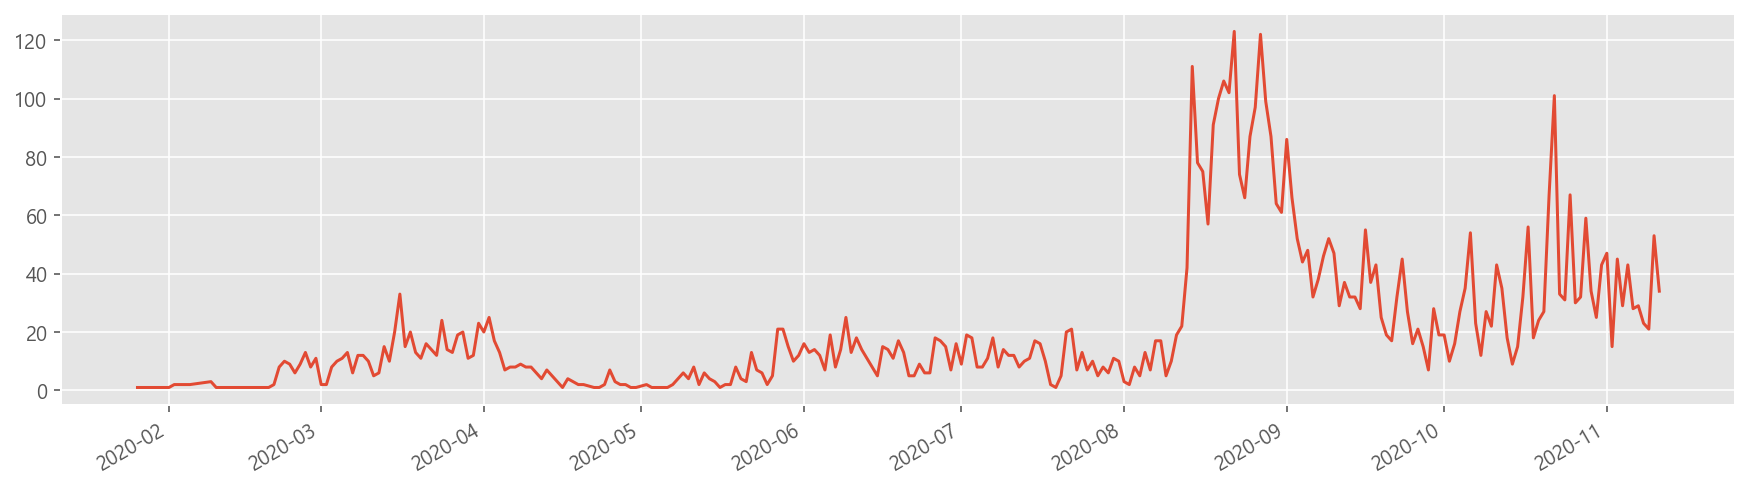

In [ ]:
# df['확진일자'].value_counts()
day_count = df['확진일자'].value_counts()
day_count.plot(figsize=(15,4))

### 1.2 최근 30일의 데이터

In [ ]:
def parse_month_day(day):
    return day[-5:]

In [ ]:
df['월일'] = df['확진일자'].astype(str).map(parse_month_day)

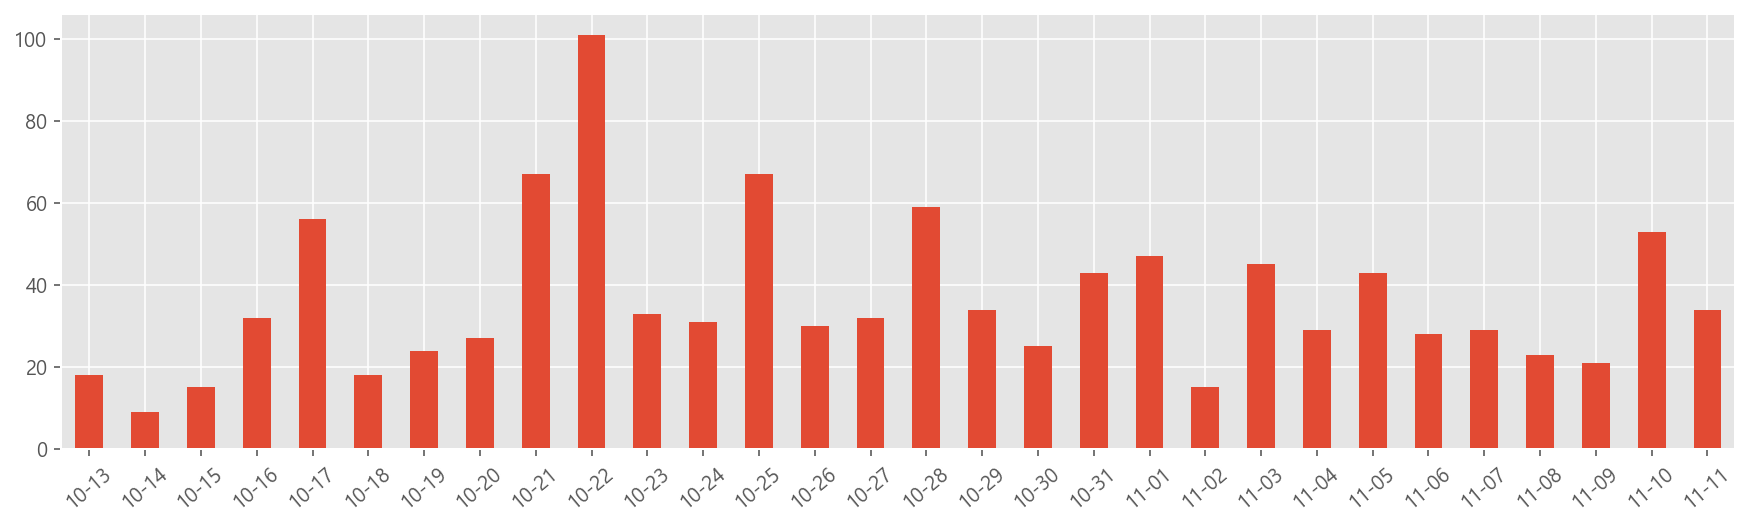

In [ ]:
day_count1 = df['월일'].value_counts()
day_count1.sort_index()[-30:].plot.bar(figsize=(15,4), rot=40)

### 1.3 확진자가 가장 많았던 날의 발생이력을 찾습니다

In [ ]:
feq_max_day = day_count[day_count==day_count.max()]
print('확진자가 가장 많았던 날(YYYY/MM/DD): ', feq_max_day.index.astype(str)[0], '\n')
df[df['확진일자'] == feq_max_day.index.astype(str)[0]].head()

확진자가 가장 많았던 날(YYYY/MM/DD):  2020-08-22 



,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월일
2372,2373,16971.0,M,67,60,2020-08-22,2020-08-20,NaN,성남-254,성남중원,NaN,불명확,grp732,접촉자,타지역에서primary가있는건,접촉자,08-22
2417,2418,16994.0,F,62,60,2020-08-22,2020-08-17,NaN,성남-256,성남분당,NaN,불명확,grp618,접촉자,NaN,접촉자,08-22
2424,2425,17062.0,F,73,70,2020-08-22,NaT,무증상,안성-17,안성,NaN,불명확,grp696,접촉자,NaN,접촉자,08-22
2426,2427,17032.0,M,69,60,2020-08-22,2020-08-21,NaN,군포-99,군포,NaN,불명확,grp705,접촉자,NaN,접촉자,08-22
2427,2428,17079.0,M,87,80,2020-08-22,2020-08-18,NaN,가평-31,가평,NaN,불명확,grp618,접촉자,NaN,접촉자,08-22


In [ ]:
# 확진자가 가장 많았던 날의 지역별 분석 
df_most = df[df['확진일자'] == feq_max_day.index.astype(str)[0]]
df_most.groupby('지역')['연번'].count().sort_values(ascending=False).reset_index().head(10)

,지역,연번
0,평택,15
1,고양,13
2,화성,9
3,용인,9
4,파주,7
5,의정부,7
6,군포,7
7,성남,6
8,수원,6
9,안양,5


### 1.4 확진일자별 누적 확진자 수

In [ ]:
day_count = day_count.sort_index()
last_day = day_count.tail(1).index[0]
first_day = day_count.head(1).index[0]
days = pd.date_range(start=first_day, end=last_day)

In [ ]:
df_days = days.to_frame()
df_days.columns = ['확진일']
df_day_count = day_count.reset_index()
df_day_count.columns = ['확진일', '확진수']

In [ ]:
# merging
df_merge = df_days.merge(df_day_count, on='확진일', how='left')
df_all_days = df_merge[['확진일', '확진수']].fillna(value=0)
df_all_days['누적확진'] = df_all_days['확진수'].cumsum()

0         1.0
1         2.0
2         NaN
3         NaN
4         NaN
        ...  
286    5684.0
287    5707.0
288    5728.0
289    5781.0
290    5815.0
Name: 확진수, Length: 291, dtype: float64

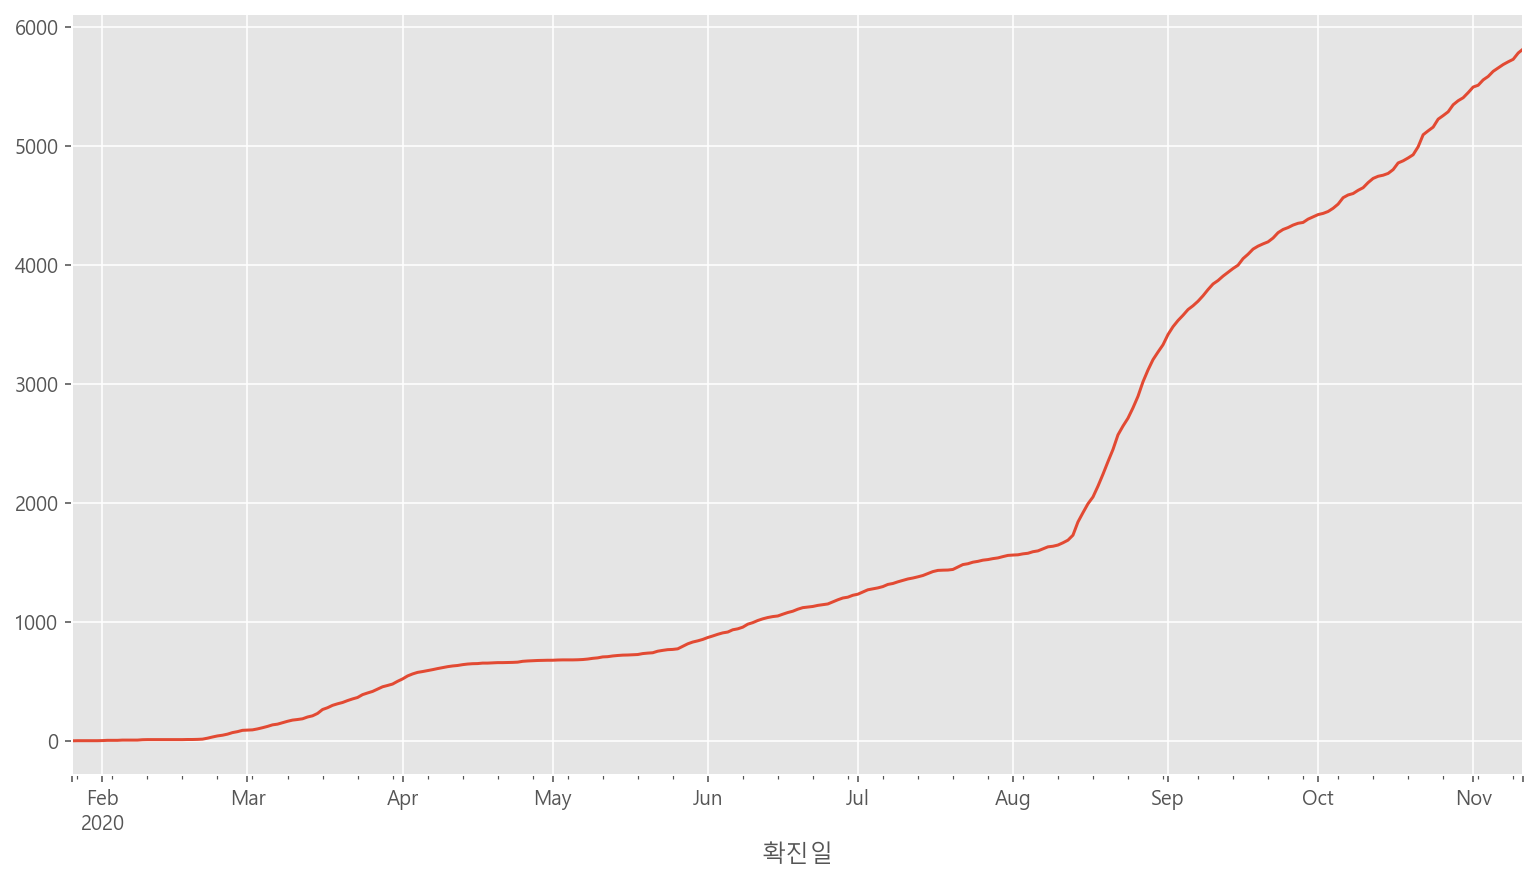

In [ ]:
all_days = df_all_days.set_index('확진일')['누적확진']
all_days.plot(figsize=(13,7))

### 1.5 요일별 확진 수

In [ ]:
df_all_days['월'] = df_all_days['확진일'].dt.month
df_all_days['요일'] = df_all_days['확진일'].dt.dayofweek

In [ ]:
df_by_day = df_all_days.groupby(['월', '요일'])['확진수'].sum().unstack().fillna(0).astype(int)
df_by_day.columns = ['월', '화', '수', '목', '금', '토', '일']
df_by_day.astype(int).style.background_gradient(cmap='Oranges')

,월,화,수,목,금,토,일
월,,,,,,,
1,1,0,0,0,0,0,1
2,10,7,11,14,10,20,15
3,71,80,49,43,58,52,59
4,19,15,34,36,31,26,16
5,12,15,32,30,35,26,25
6,47,78,47,47,56,60,36
7,31,57,61,67,63,29,27
8,202,202,232,277,329,308,220
9,94,220,237,163,132,131,98


# 2. 지역별 확진자 현황 분석

In [ ]:
# putting 지역/시 together
df.loc[df['지역'].str.contains('용인'), '지역'] = '용인'
df.loc[df['지역'].str.contains('평택'), '지역'] = '평택'
df.loc[df['지역'].str.contains('수원'), '지역'] = '수원'
df.loc[df['지역'].str.contains('안산'), '지역'] = '안산'
df.loc[df['지역'].str.contains('안양'), '지역'] = '안양'
df.loc[df['지역'].str.contains('성남'), '지역'] = '성남'
df.loc[df['지역'].str.contains('고양'), '지역'] = '고양'
df.loc[df['지역'].str.contains('남양주'), '지역'] = '남양주'

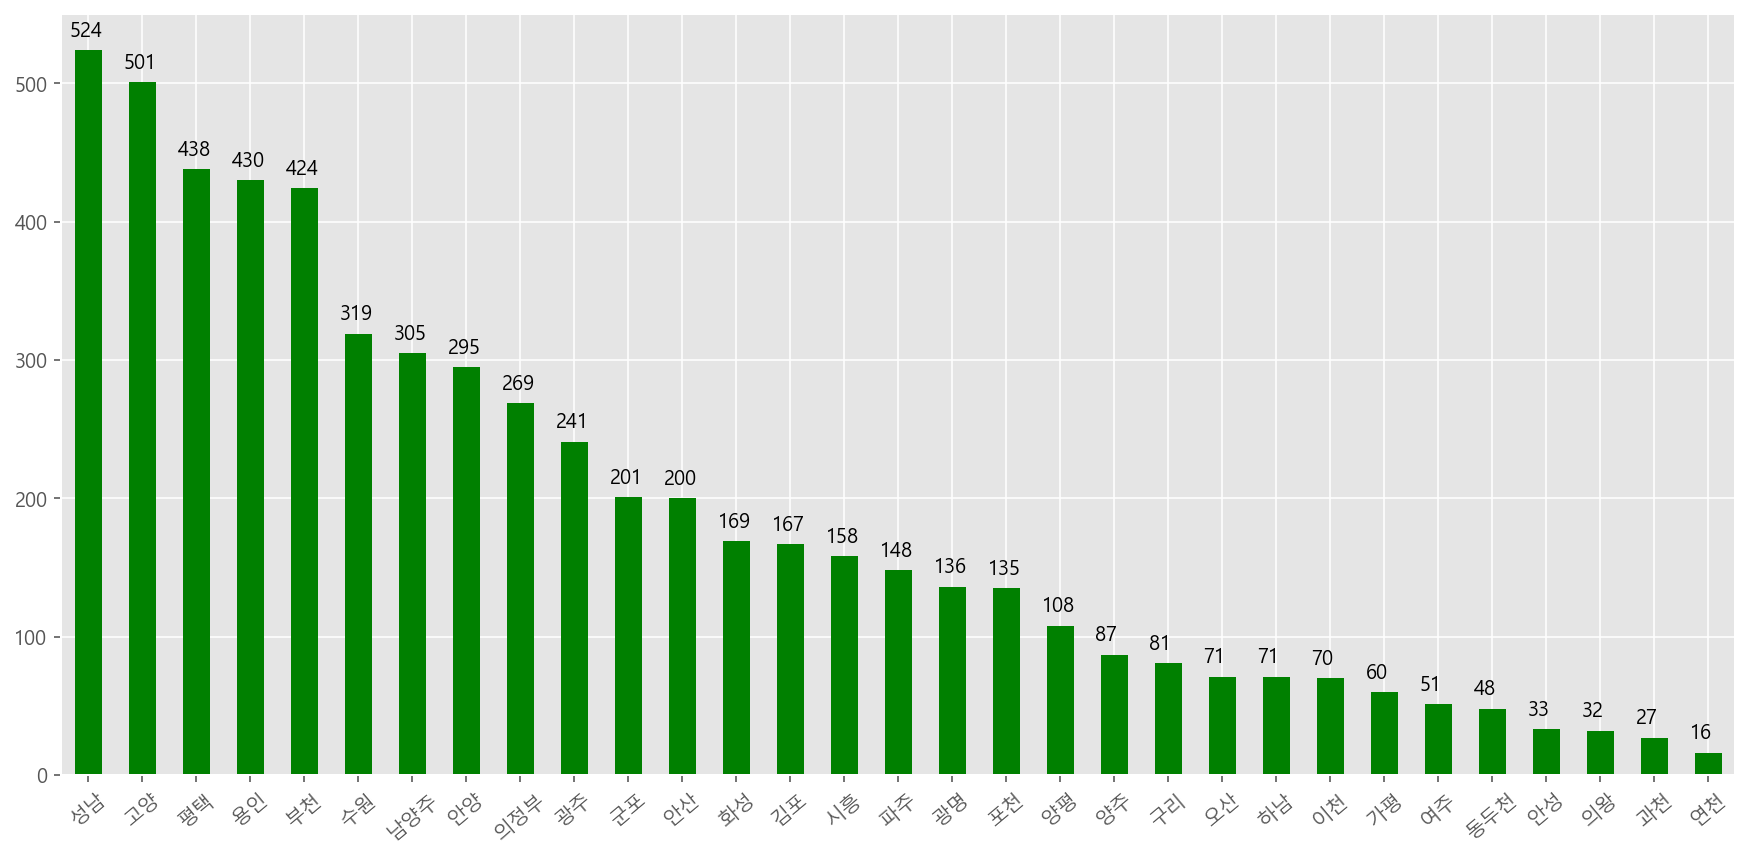

In [ ]:
geo_count = df['지역'].value_counts()
g = geo_count.plot.bar(rot=40, figsize=(15,7), color='g')
for i, j in enumerate(geo_count):
    g.text(x=i-0.35, y=j+10, s=j)

# 3. 성별, 연령대별 확진자 현황 분석

### 3.1 성별별 확진자 수 분석

In [ ]:
import seaborn as sns

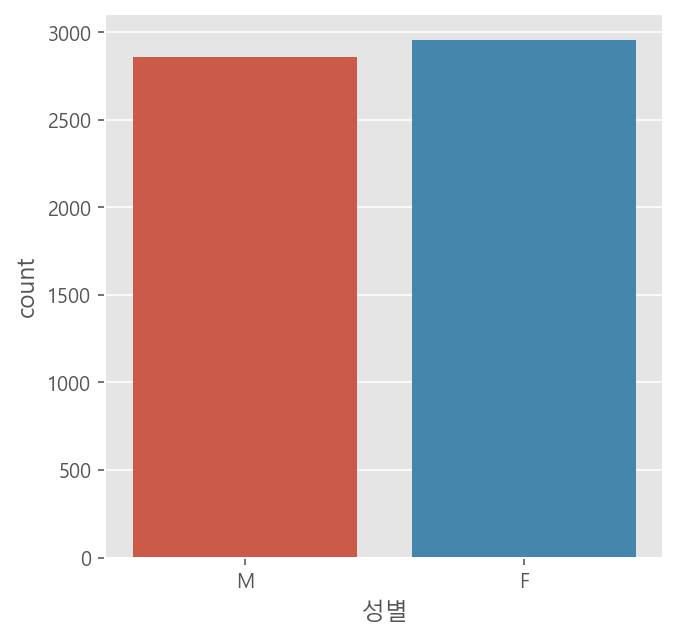

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df[['연번', '성별']], x='성별')

### 3.2 연령대별 확진자 수 분석

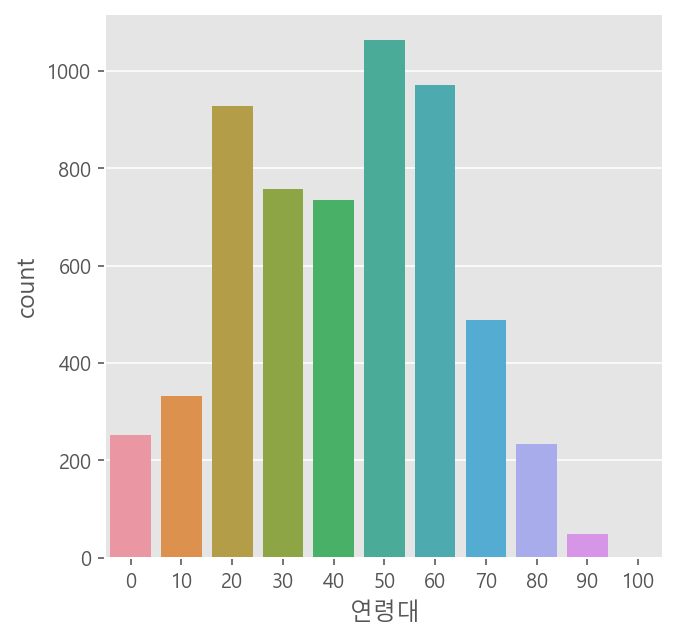

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df[['연번', '연령대']], x='연령대')

### 3.3 성별, 연령대별 확진자 수 분석

In [ ]:
df_gender_age = pd.DataFrame(df.groupby(['연령대', '성별'])['연번'].count())
df_gender_age.columns = ['확진자수']
df_gender_age.head(10)

확진자수
연령대 성별      
0   F    125
    M    127
10  F    132
    M    201
20  F    383
    M    546
30  F    342
    M    416
40  F    373
    M    361

In [ ]:
hello = df['연령대'].value_counts().sort_index().tolist()
hello

[252, 333, 929, 758, 734, 1064, 972, 489, 234, 48, 2]

In [ ]:
df_unstack = df_gender_age.unstack().fillna(0).astype(int)
# df_unstack.columns = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
df_unstack.columns = ['F', 'M']
df_unstack

,F,M
연령대,,
0,125,127
10,132,201
20,383,546
30,342,416
40,373,361
50,604,460
60,543,429
70,279,210
80,139,95


Text(0.5, 1.0, '연령대, 성별별 확진자 수')

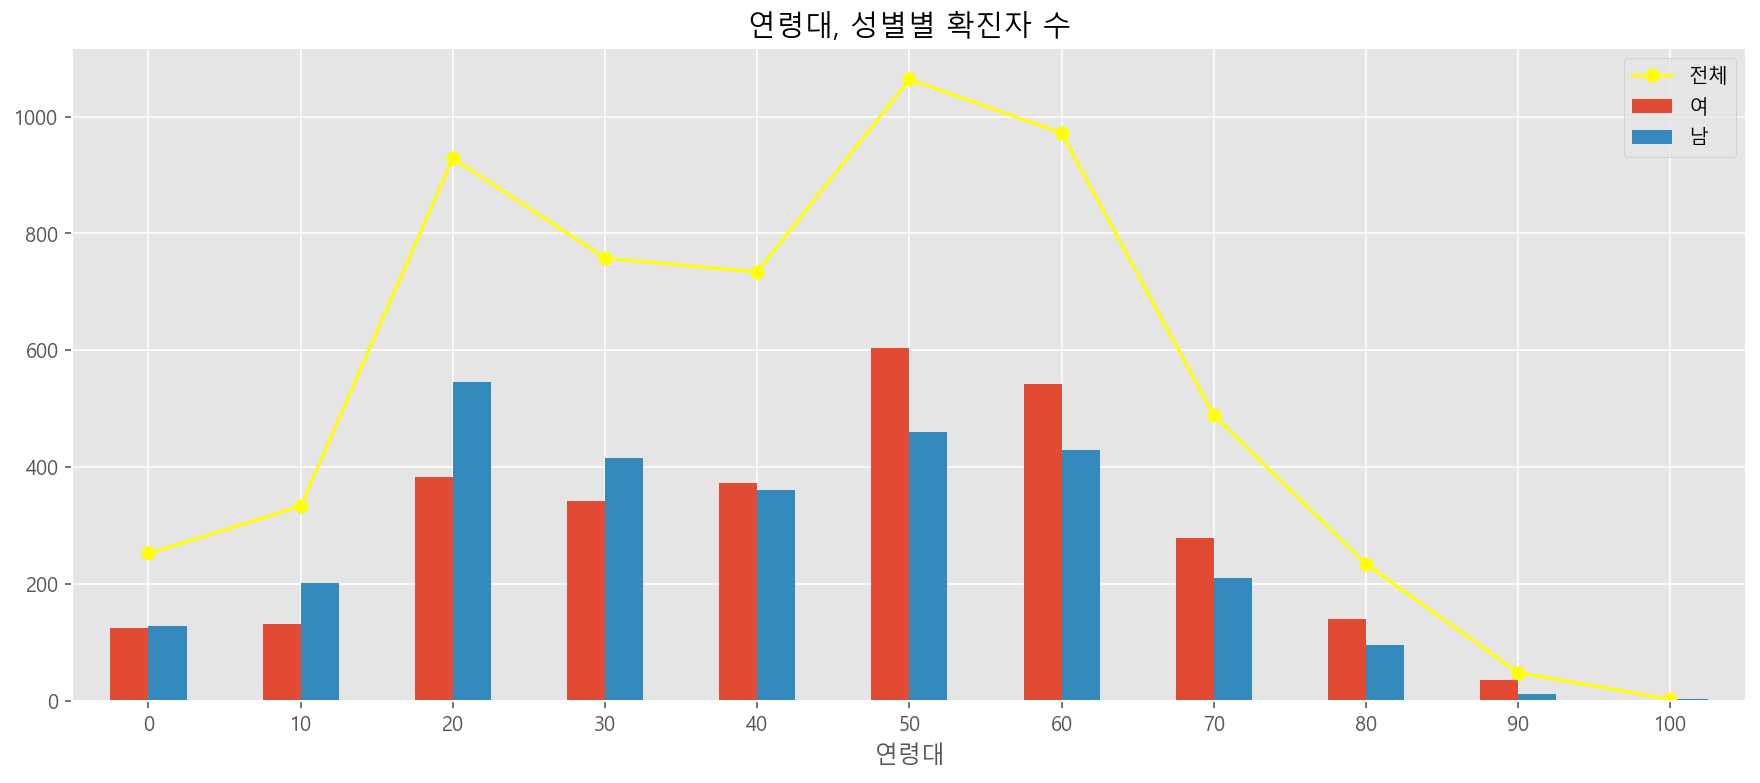

In [ ]:
df_unstack[['F','M']].plot.bar(figsize=(15,6), rot=0)
plt.plot(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'], hello, color='yellow', marker='o')
plt.legend(['전체', '여', '남'])
plt.title('연령대, 성별별 확진자 수')

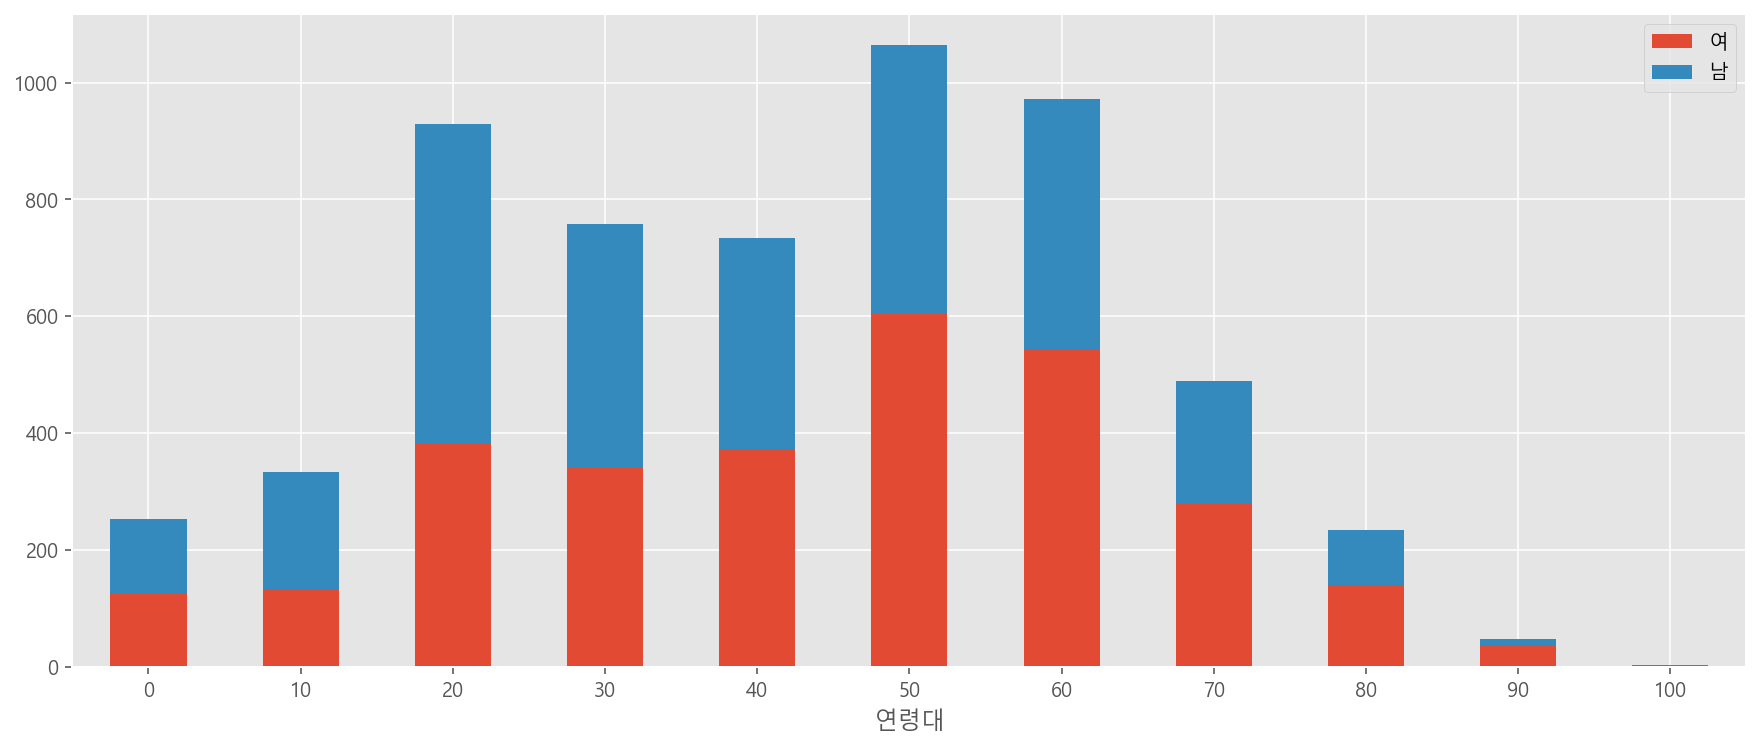

In [ ]:
df_unstack[['F','M']].plot.bar(figsize=(15,6), rot=0, stacked=True)
plt.legend(['여', '남'])

# 4. 감염경로 분석

### 4.1 감염경로 별

In [ ]:
df['감염경로_그룹'] = df['감염경로']
df.loc[~df['감염경로_그룹'].isin(['불명확', '해외유입']), '감염경로_그룹'] = '기타'

In [ ]:
df['감염경로_그룹'].value_counts(normalize=True)*100

불명확     83.336199
해외유입    14.273431
기타       2.390370
Name: 감염경로_그룹, dtype: float64

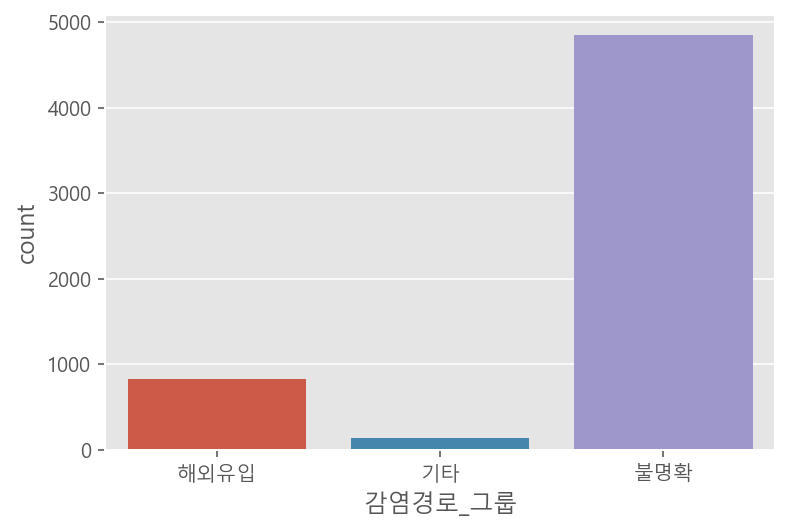

In [ ]:
sns.countplot(data=df[['연번', '감염경로_그룹']], x='감염경로_그룹')

### 4.2 확진일자별 해외유입 확진자 수

In [ ]:
df_overseas = df[df['감염경로'] == '해외유입']

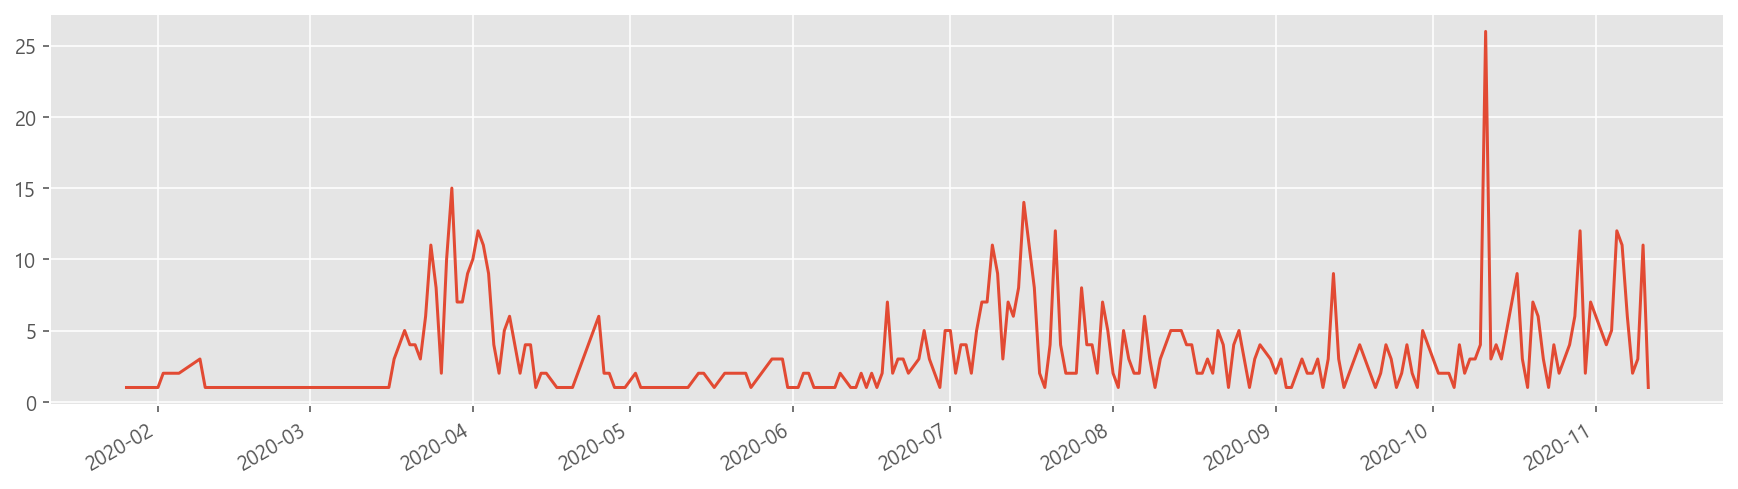

In [ ]:
df_overseas['확진일자'].value_counts().sort_index().plot(figsize=(15,4))